<a href="https://colab.research.google.com/github/Saniyashakur22/ML-Classification-Project/blob/main/ML_Classification_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Mobile Price Range Prediction using Machine Learning**

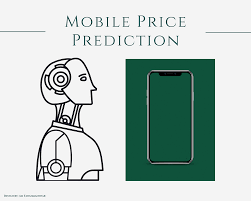

# ***Problem Statement:***

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.



### ***Data Description :***
**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of

0(low cost),

1(medium cost),

2(high cost) and

3(very high cost).

Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [ ]:
##Importing the requried libraries and modules
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
from google.colab import files
upload=files.upload()

In [ ]:
#Importing the dataset
df_main = pd.read_csv(io.BytesIO(upload['data_mobile_price_range.csv']))
print(df_main)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

# ***Data Exploration And Data Cleaning***


In [ ]:
# Checking first five rows
df_main.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Checking last five rows

df_main.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
## Checking total rows and columns in the dataset

print("Shape of Dataframe is :" ,df_main.shape , "\n", "Total number of rows in dataset : ",df_main.shape [0], "\n","Total number of columns in dataset : ",df_main.shape [1], "\n",)


Shape of Dataframe is : (2000, 21) 
 Total number of rows in dataset :  2000 
 Total number of columns in dataset :  21 



In [ ]:
# Checking Statistic of the data

df_main.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [ ]:
# Another Method to do it
df_main.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


From the above output,

  Its not possible to have minimum value 0 of sc_width and px_height in any mobile so we need to handle this mismatch.


In [ ]:
# Checking How many observations having screen width value as 0.
print(df_main[df_main['sc_w'] == 0].shape[0])

180


In [ ]:
# Checking How many observations having px_hieght value as 0.
print(df_main[df_main['px_height']==0].shape[0])

2


In [ ]:
# As there are only 2 observations having px_height=0. so we will drop it.
df_main=df_main[df_main['px_height']!=0]

In [ ]:
## Checking columns

df_main.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
## checking datatypes of columns

df_main.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

## Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the titanic dataset to see how it works.
* Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df_main['sc_w']=df_main['sc_w'].replace(0,np.nan)

In [ ]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df_main=pd.DataFrame(impute_knn.fit_transform(df_main),columns=df_main.columns)

In [ ]:
# Checking shape
df_main.shape

(1998, 21)

In [ ]:
# Checking How many observations having sc_w value as 0.
df_main[df_main['sc_w']==0].shape[0]

0

**Thus we have handled our mismatched values of the data.**

In [ ]:
## Checking the info of dataframe and knowing data types of columns.

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

### **So here we can see,**

**1. We don't have any object data type in our data set.**

**2. Also we have Zero null values in data set.**

**3. Price_range is our target variable.**

In [ ]:
#checking null values
df_main.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Form above output we can see that there is not missing or null value in our dataset. So we move to above analysis.**

In [ ]:
#set style
# plt.style.use('seaborn')
sns.set()


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

Text(0.5, 1.0, ' Visualising Missing Values')

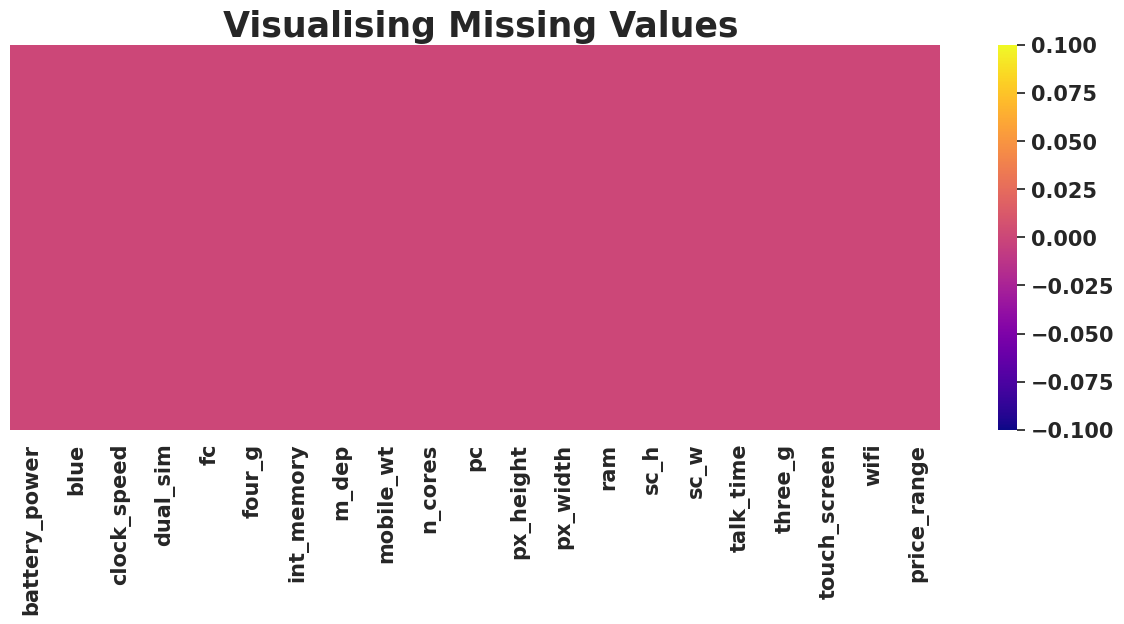

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df_main.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

**So form above heatmap we can see that we do not habing any missing value in our data.**

In [ ]:
## Checking Duplicate rows in our Dataset.
duplicates=df_main.duplicated().sum()
print(f"We are haveing {duplicates} rows in our Dataframe.")

We are haveing 0 rows in our Dataframe.


# ***Exploratory Analysis and Visualization***

**Let,s see our hero of our story i.e our target variable...........**

In [ ]:
# lets have look at our target variable's counts
price_range_values=df_main['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

***Wow.! we have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.***

***This is the target variable with value of***

***0=low cost,***

***1=medium cost,***

***2=high cost,***

***3=very high cost.***

<Axes: ylabel='price_range'>

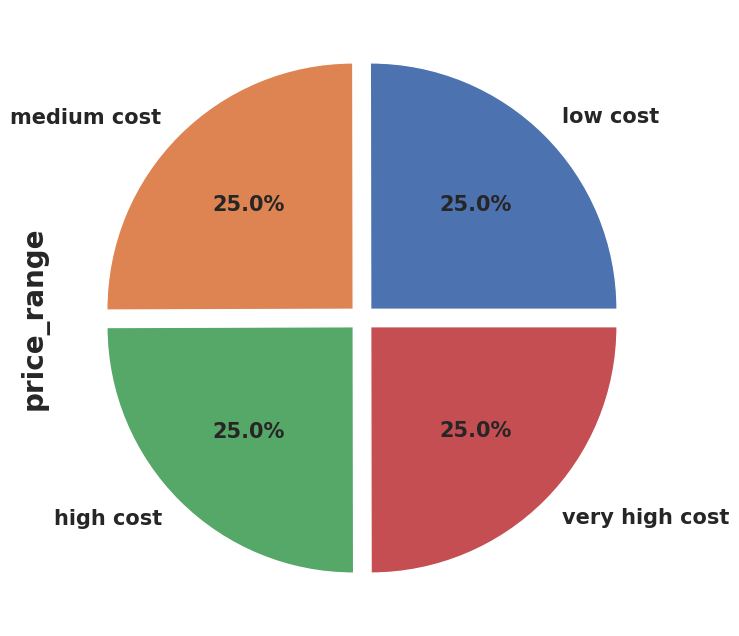

In [ ]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart




*   **We can see that our target varibale is nearly equally distributed.**

*   **Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.**

### So let's move ahead !



# ***Let's checking correlation between target(dependent) variable and independent variable***

<Axes: >

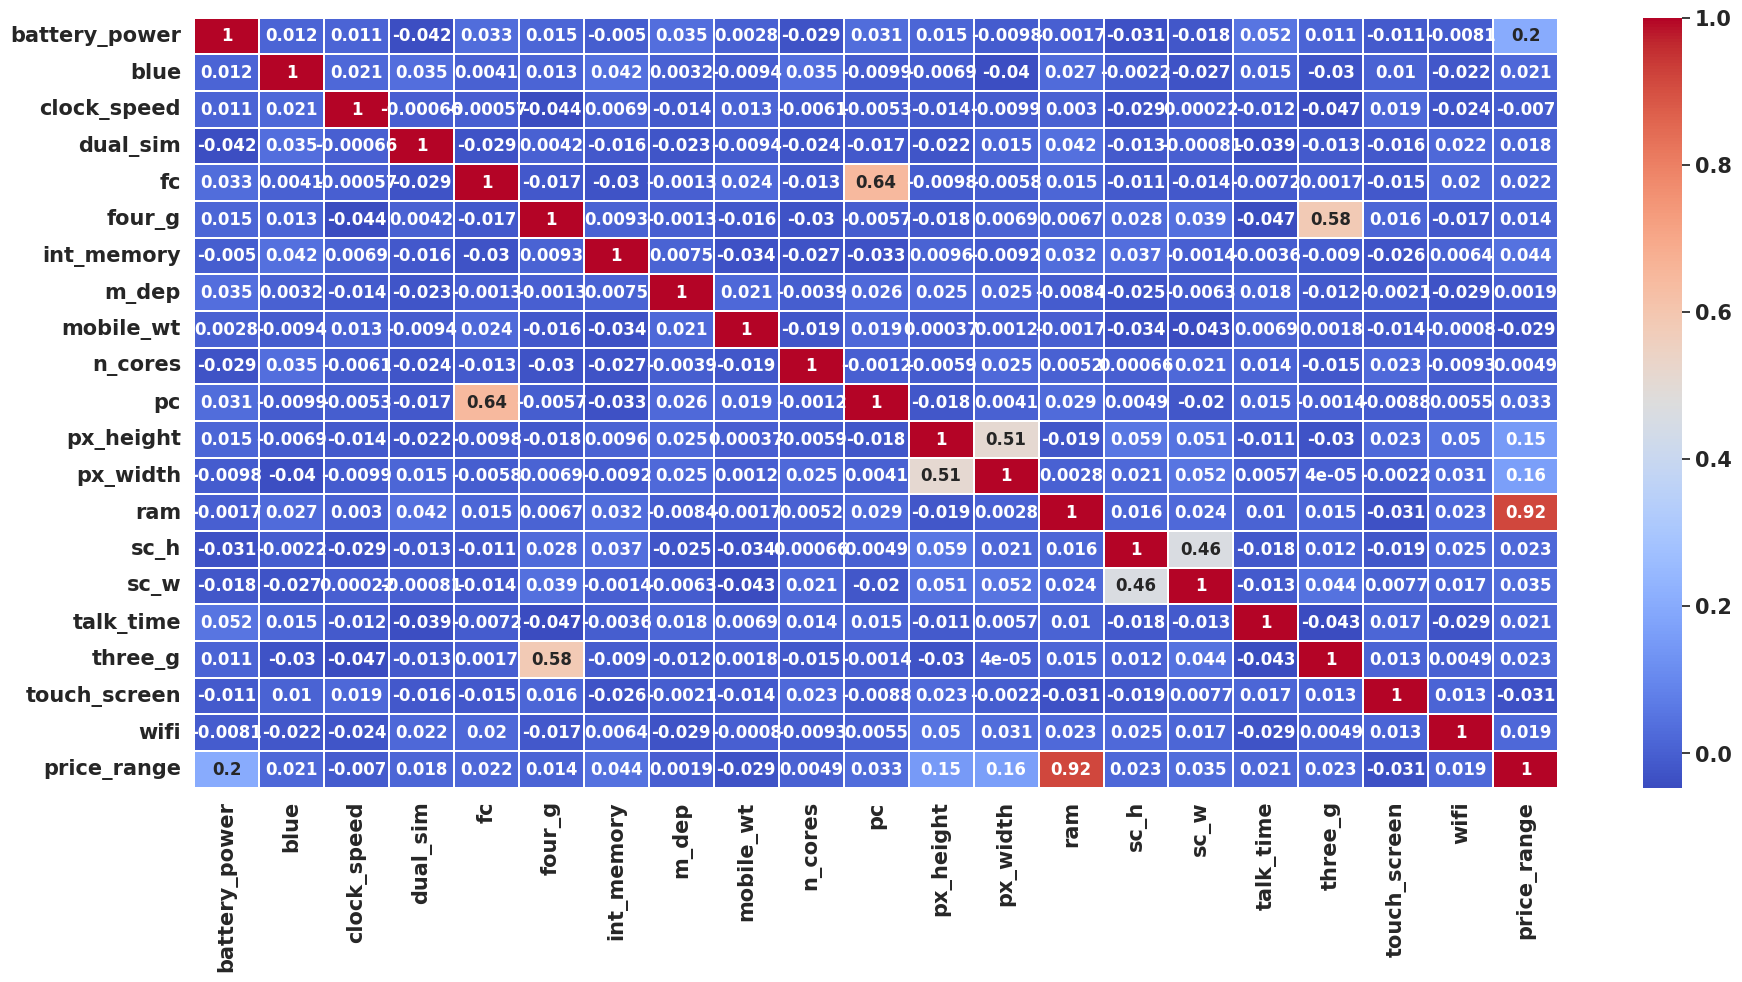

In [ ]:
data_corr= df_main.corr()
plt.figure(figsize=(22,10))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells,
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

### **Observations:**

**1. RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.**


**2. Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.**


**3. Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.**


**4. Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.**


**5. Primary camera i.e pc and front camera fc are positively correlated.**


**6. sc_h and sc_w are positively correlated**

# **Univariate Analysis of Categorical columns.**

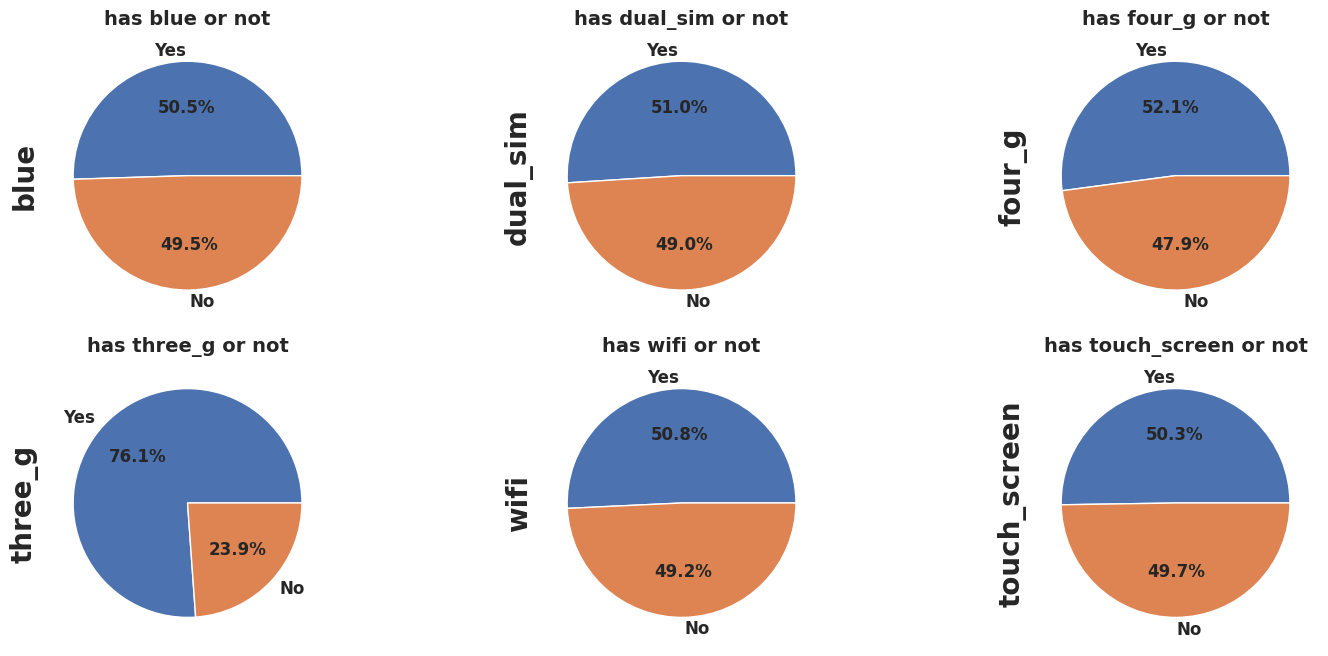

In [ ]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df_main[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1


***1. 1 means it has the specifications.***

***2. 0 means it do not have the specifications.***

***3. Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.***

***4. very few mobiles(23.8%) do not have Three_g.***

## **Relation Between RAM,Battery_power,px_height and px_width**

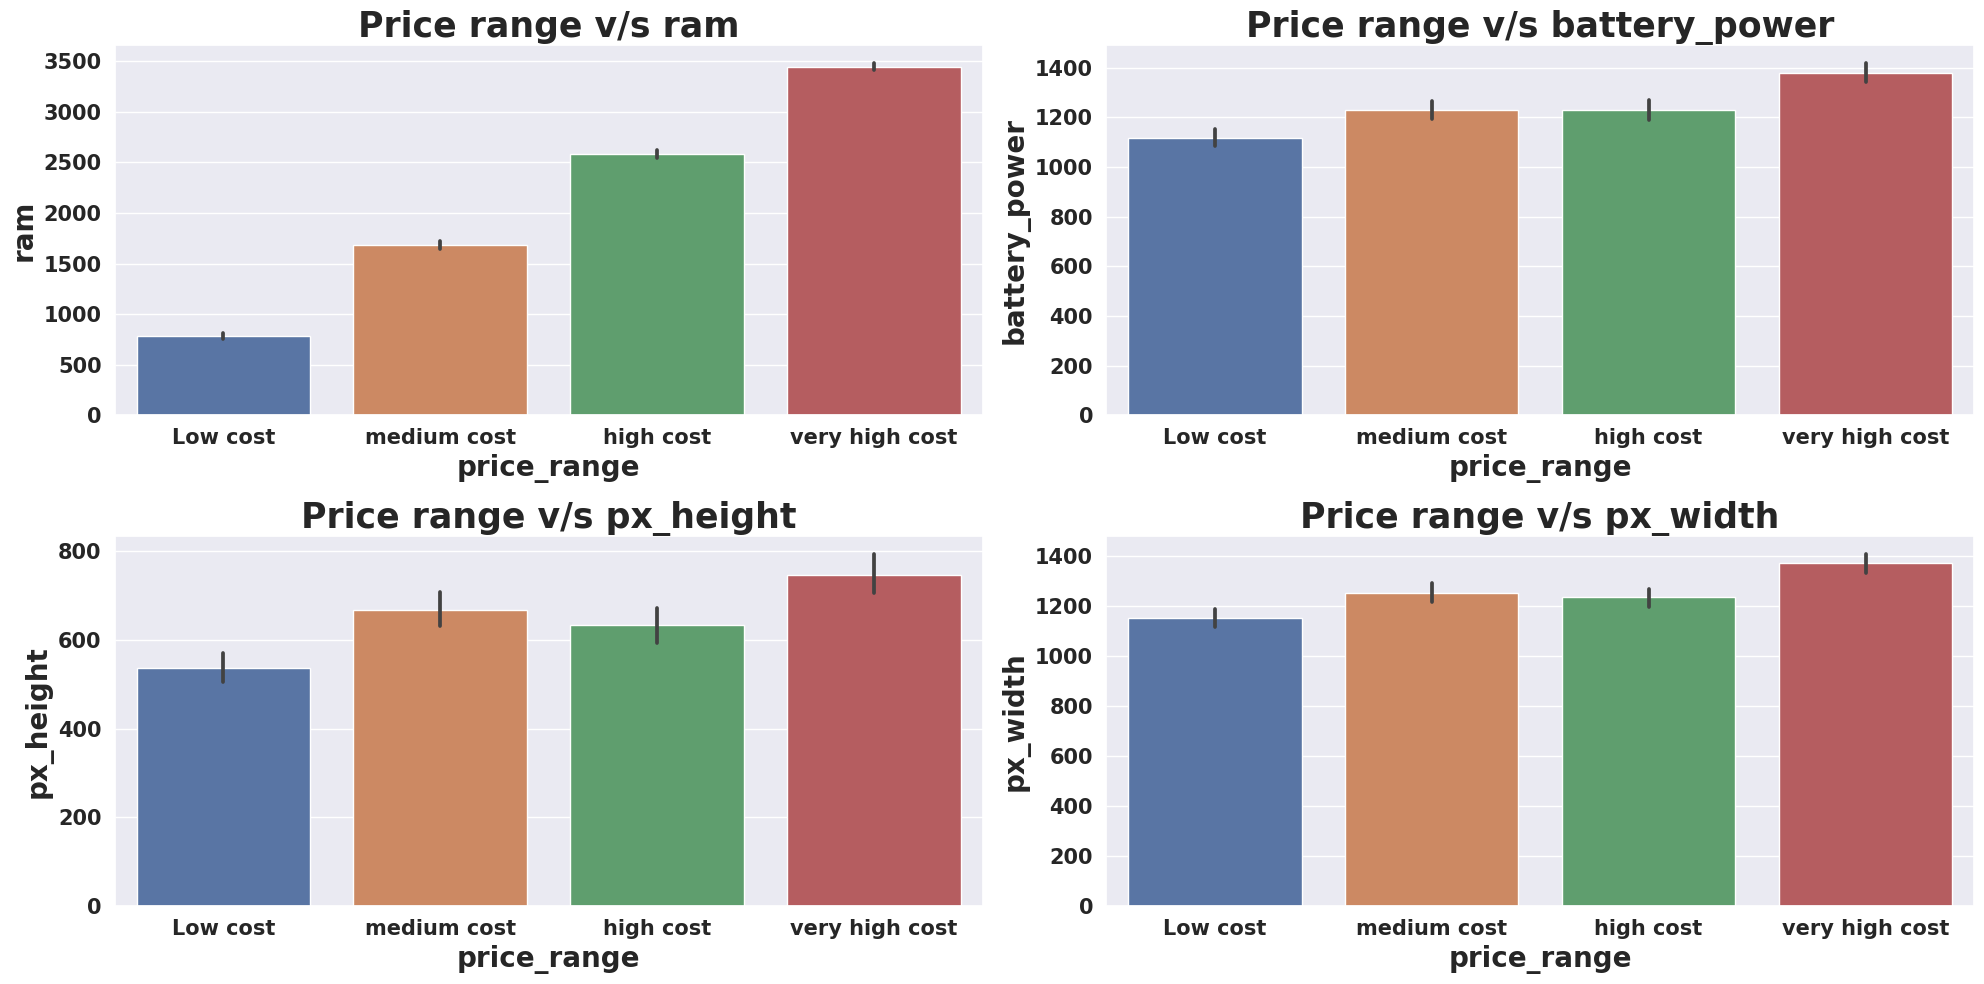

In [ ]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df_main['price_range'],y=df_main[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()
  plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
  plt.xticks(rotation=0)



### **Observations:**
* ***Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.***
* ***Mobiles having RAM less than 1000 MB falls under low cost category.***
* ***Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.***
* ***Mobiles with more than 700 pixel height and width more than 1300 has very high cost.***

In [ ]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=df_main.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()
my_colors = 'rgbkymc'

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low cost'),
  Text(1, 0, 'medium cost'),
  Text(2, 0, 'high cost'),
  Text(3, 0, 'very high cost')])

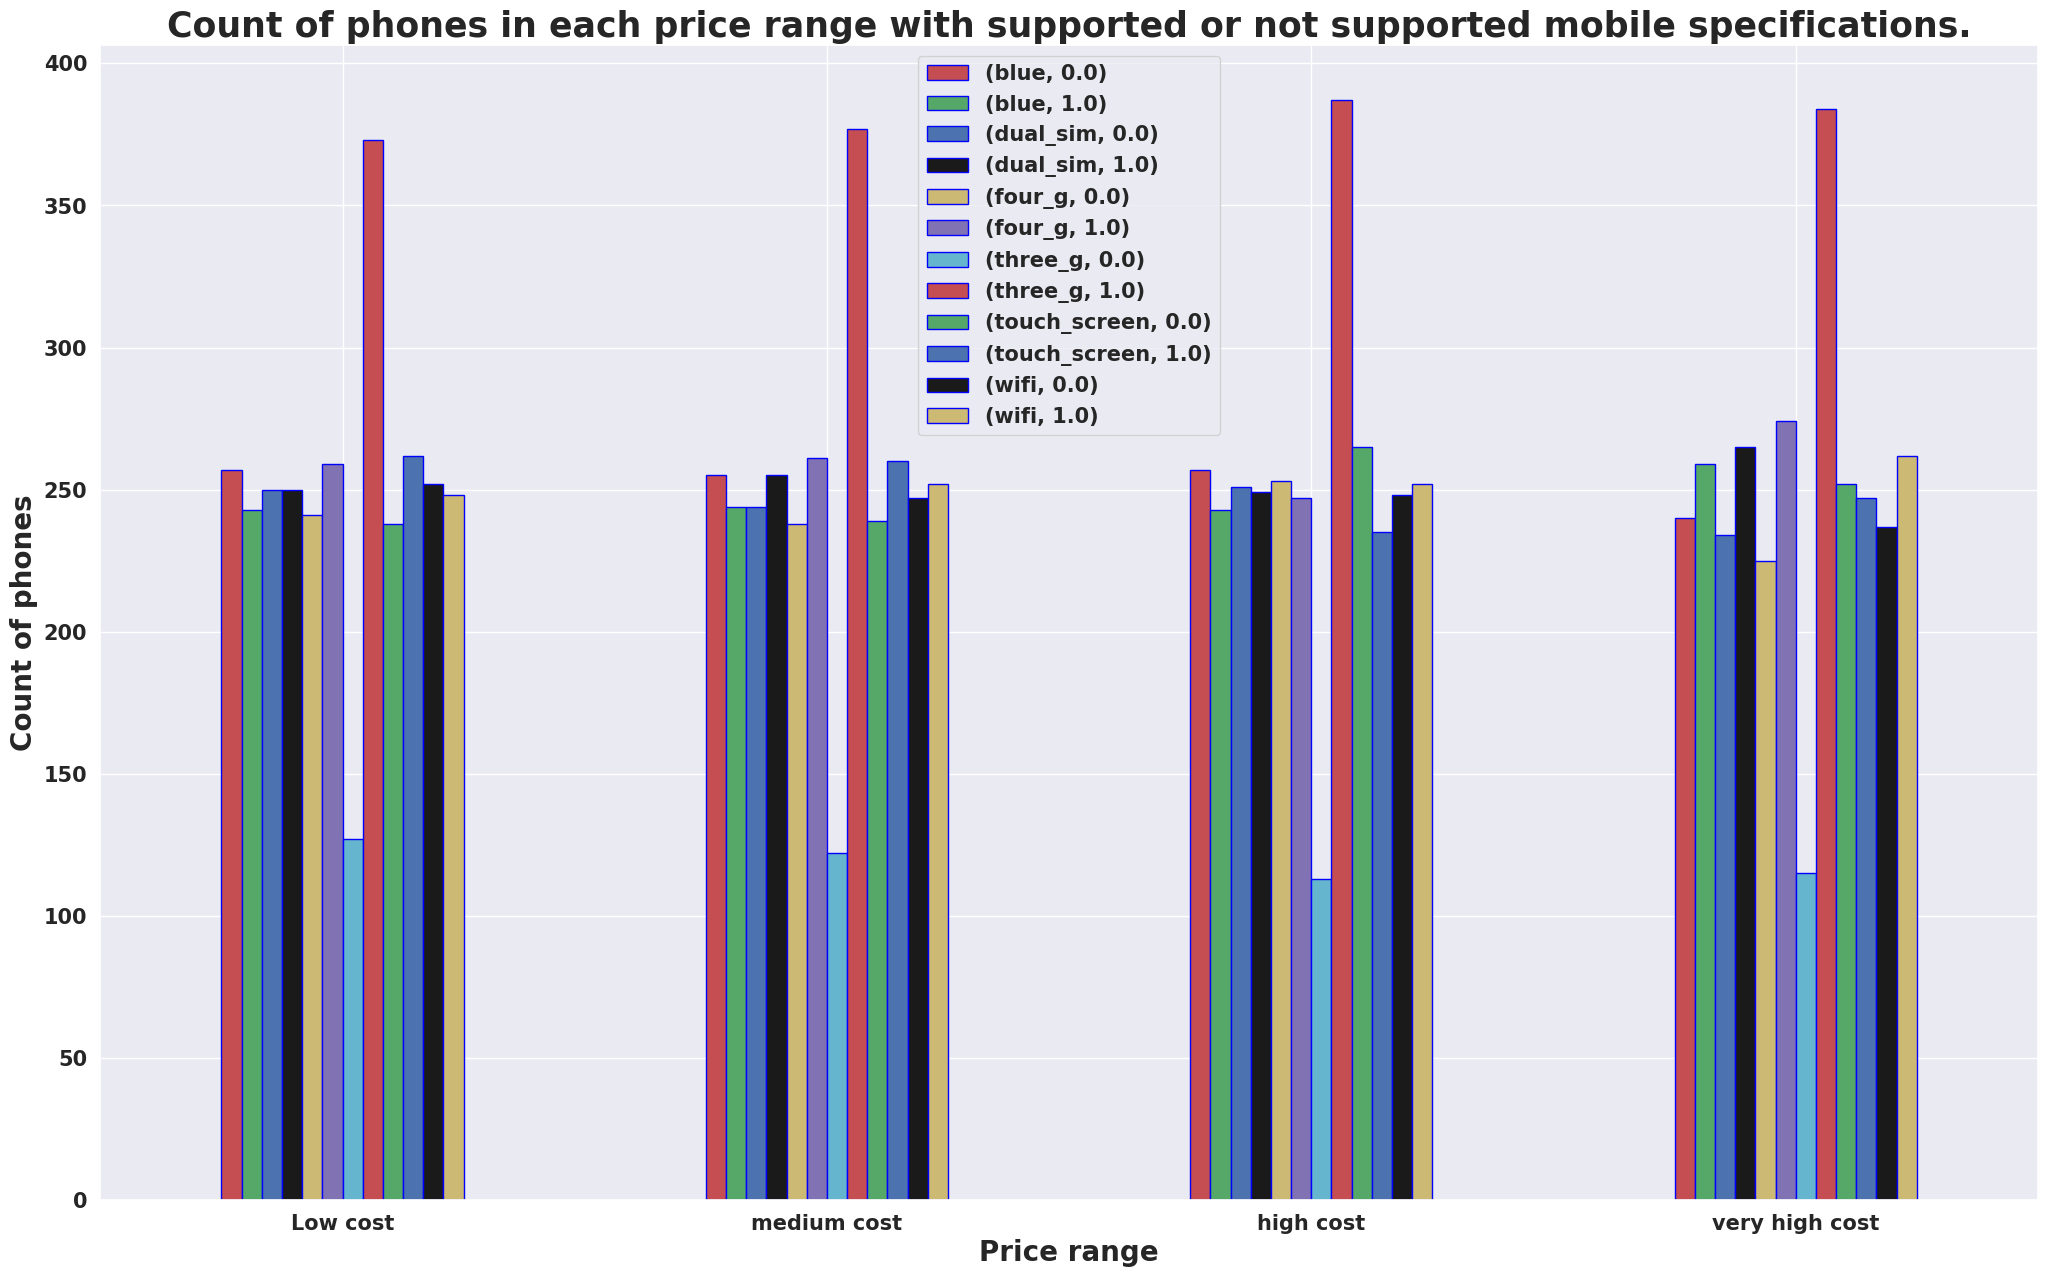

In [ ]:
# visualising by plotting barchat.
# plt.figure(figsize=(8,6))
grup_by_price.plot.bar(figsize=(25,15),edgecolor='blue',color=my_colors)
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.ylabel('Count of phones')
plt.legend(loc='upper center')
plt.xticks(rotation=0)

### **Observations**

***We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.***

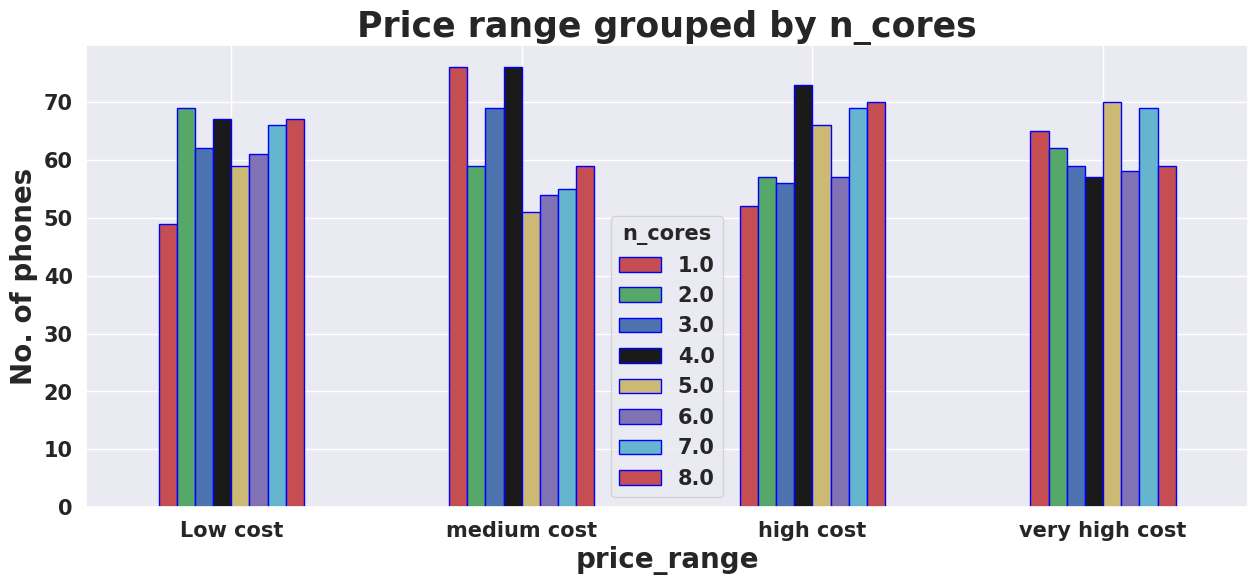

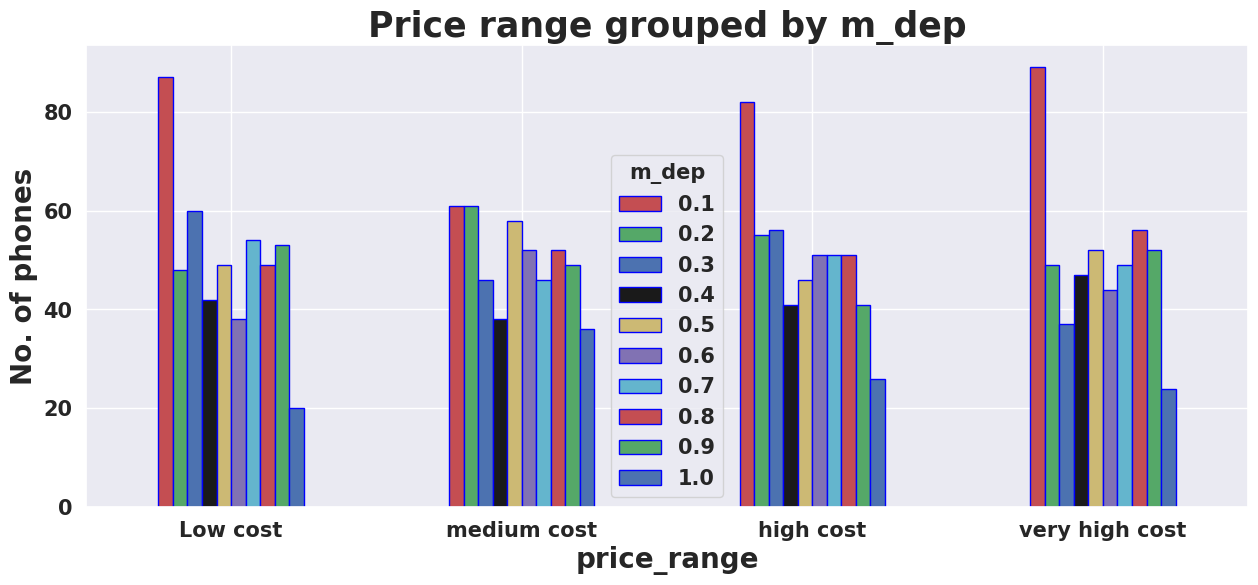

In [ ]:
list_2=['n_cores','m_dep']
for item in list_2:

  df_main.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6),edgecolor='blue',color=my_colors)
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')
  plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
  plt.xticks(rotation=0)

### **Observation**
* ***There are very few mobiles in price range 0 and 1 with lesser no of cores.***
* ***Most of the mobiles in price range 2 and 3 are with high no of cores.***

* ***Number of phones with less thickness is high and count of phones with high thickness is low.***

#**Let's Check which numerical feature is driving the price range most.**

In [ ]:
df_main.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

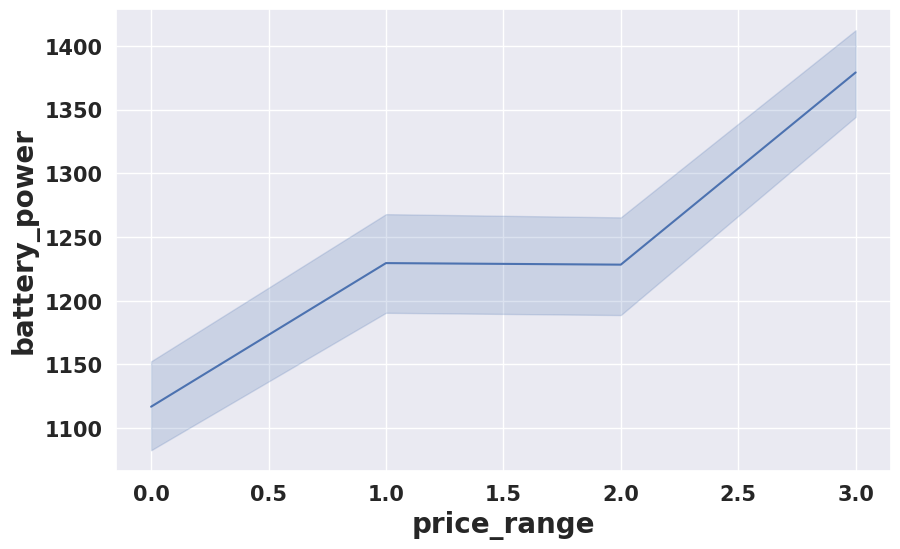

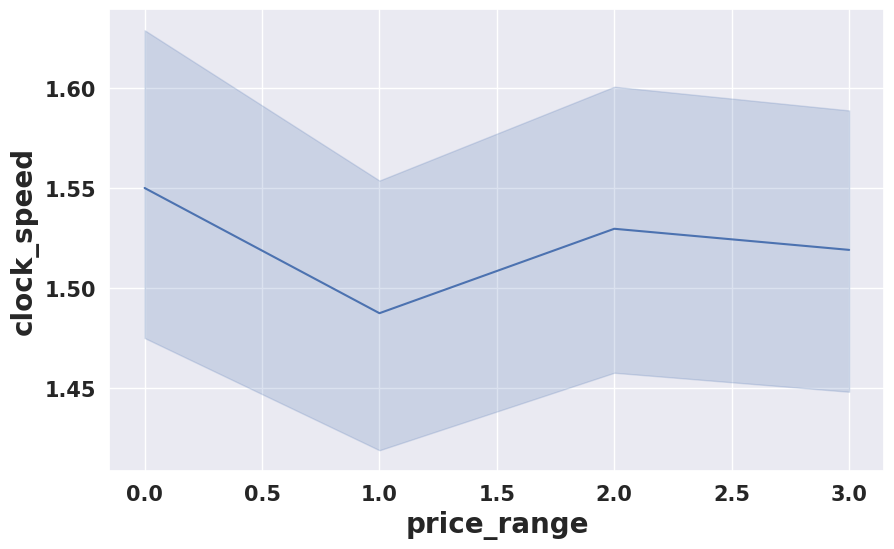

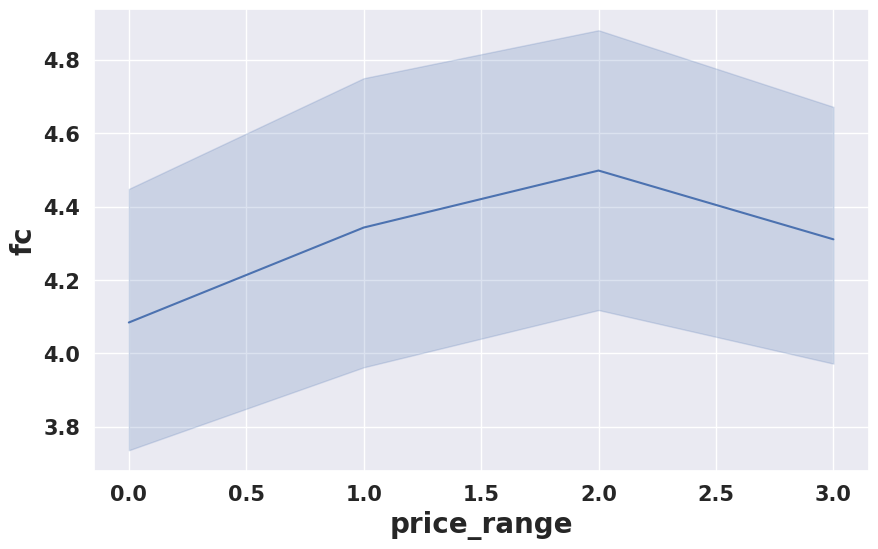

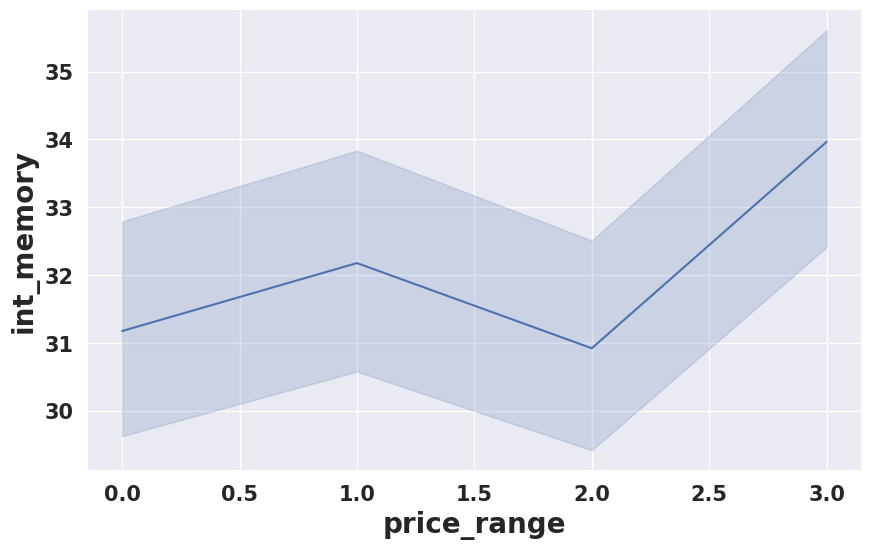

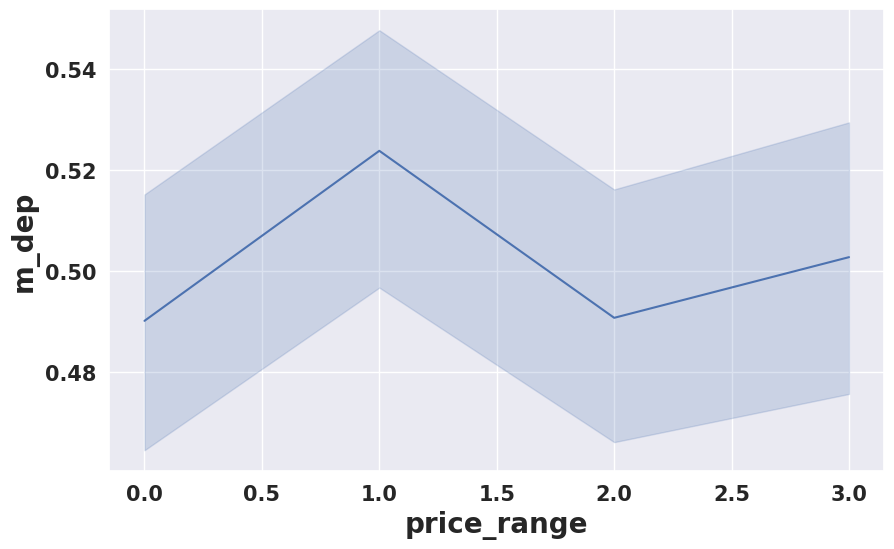

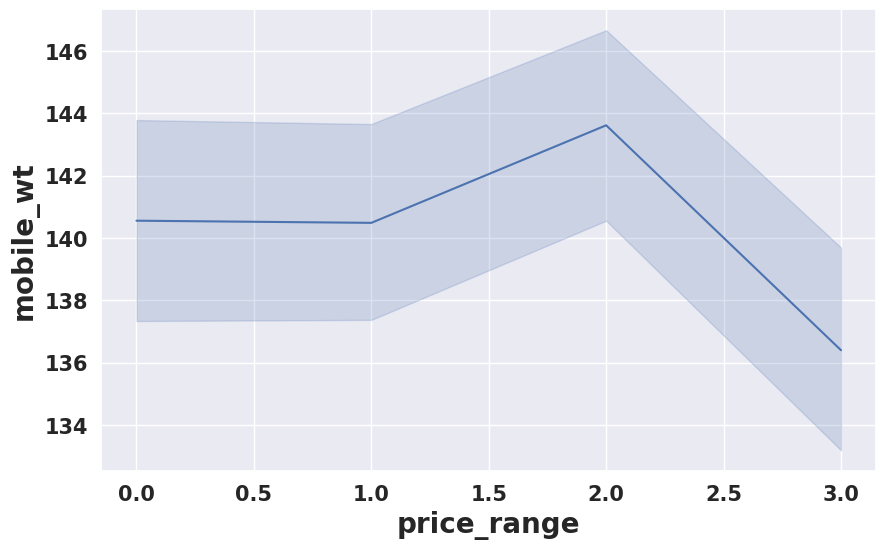

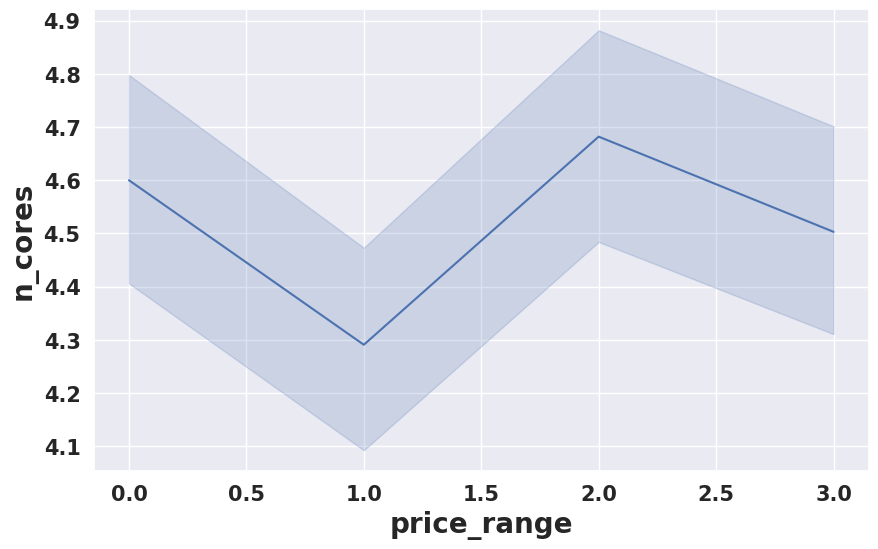

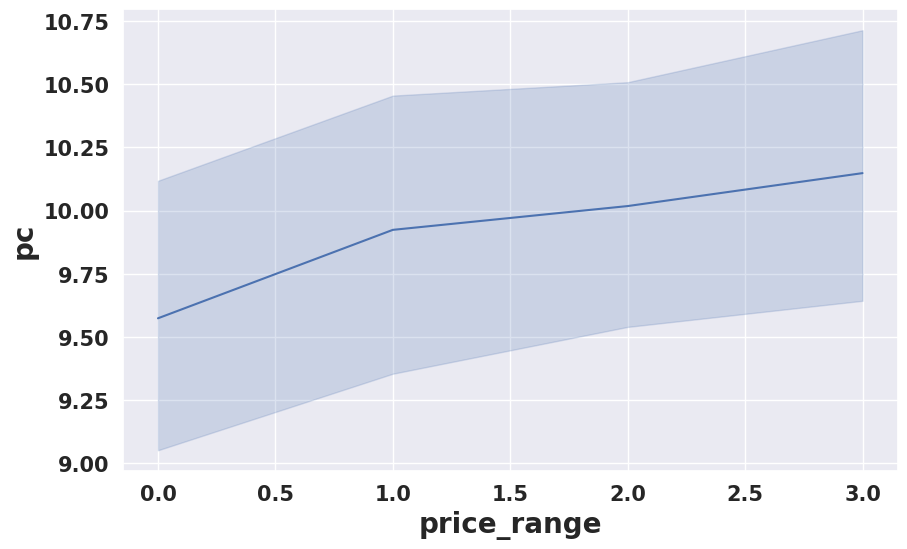

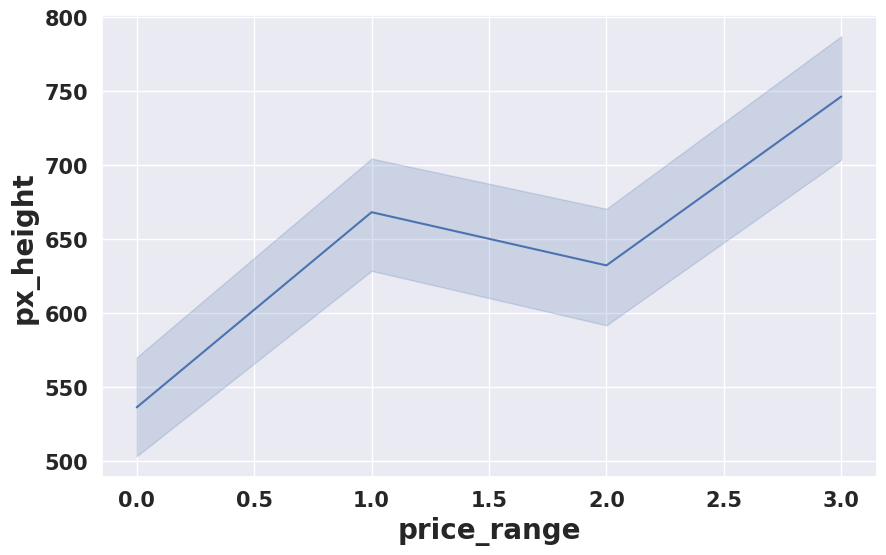

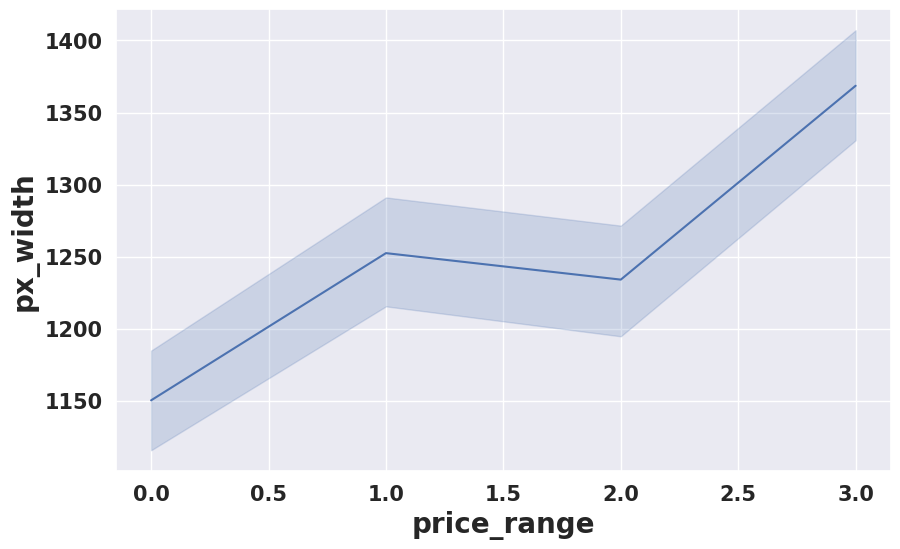

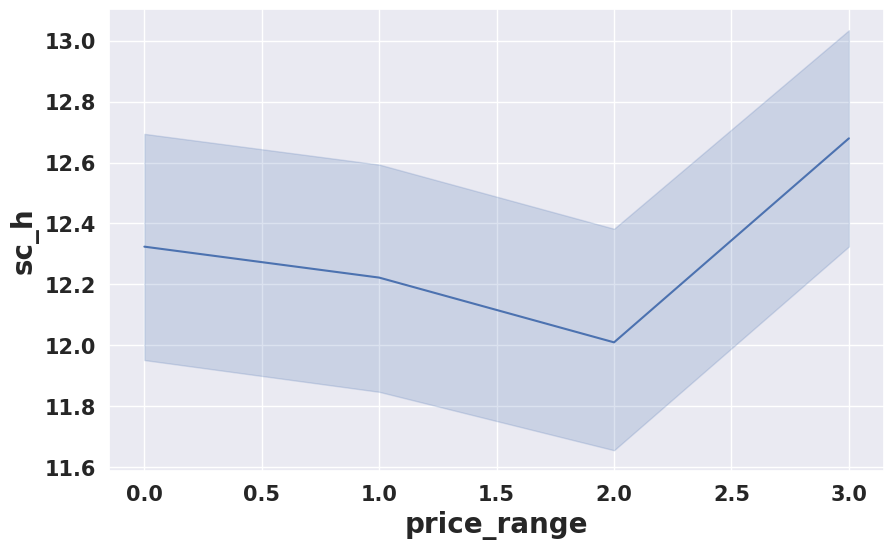

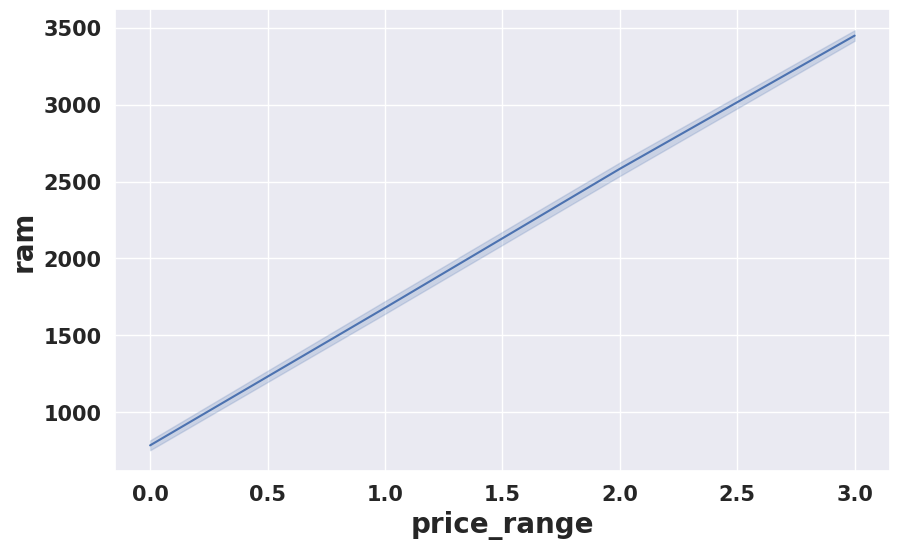

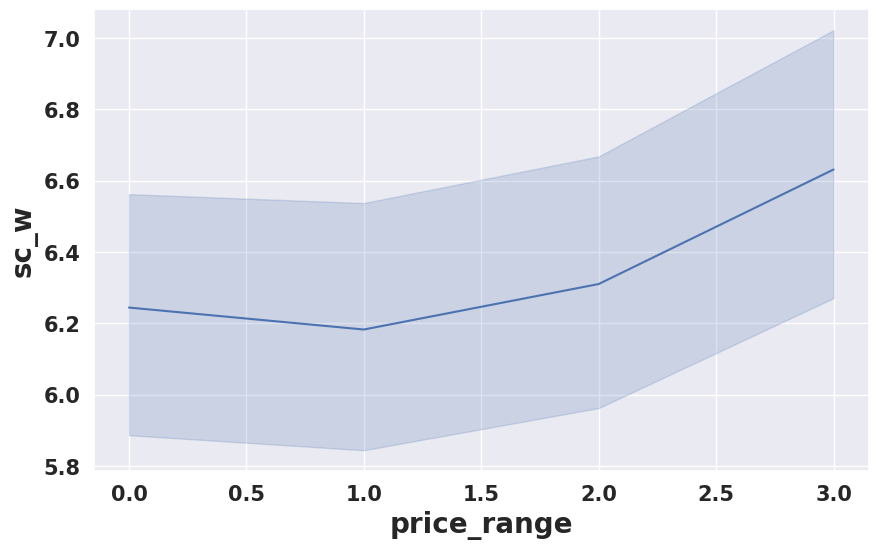

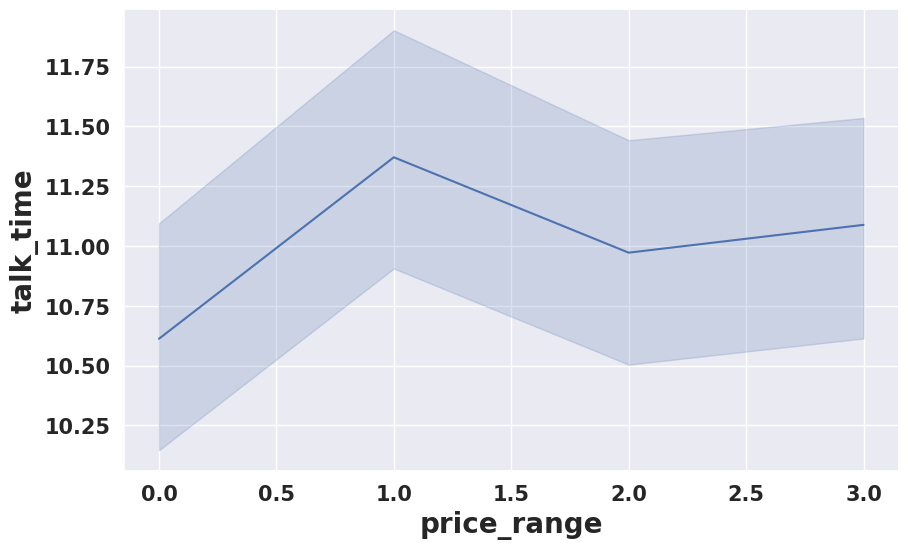

In [ ]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))

    sns.lineplot(x=df_main['price_range'],y=df_main[var])


### **Observations**
* ***For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.***
* ***Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.***
* ***Mobiles having max screen  height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases***
***RAM has clear relationship with price range we saw that in correlation matrix also.***